Первые 5 строк данных
   id     num01     num02     num03     num04     num05     num06     num07  \
0   1 -0.946058 -0.070313  1.824445 -2.754422  0.808865 -0.111094 -0.268950   
1   2 -2.484027  0.739378  1.596908 -2.586479 -0.033225 -3.054412 -4.706908   
2   3  1.522629  7.159635 -0.564903 -4.493110  1.623610  5.450187 -0.974595   
3   4  0.463373 -1.073908  1.752813  0.362786  2.790872  4.082385  0.322283   
4   5  3.188390 -4.701692 -0.689918 -0.448995  0.373821 -3.275363 -1.760931   

      num08     num09  ...     num20     num21     num22     num23     num24  \
0 -3.078210  0.801275  ... -1.616515 -1.989464  1.407390 -0.218362  2.016052   
1 -9.795169  0.145911  ... -1.727040 -0.583997  1.136761  0.285978 -0.310879   
2 -5.189589  1.600591  ...  0.524408  2.022430  1.278358 -0.850547  0.847457   
3  3.390984 -0.033929  ...  2.399834 -1.431576 -0.746987  0.049639  2.414689   
4  0.923689  0.537345  ... -2.183407 -2.896590  2.440343 -1.097168  1.457323   

   cat_contract  cat_r

C:\Users\andre\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\andre\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\andre\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital


F1-score на тестовой выборке
DummyClassifier     : 0.0000
LogisticRegression  : 0.7076
DecisionTree        : 0.7924
RandomForest        : 0.8792
GradientBoosting    : 0.8868
Stacking            : 0.8936

Лучшая модель по F1: Stacking (0.8936)

Подробный отчёт: Stacking
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1624
           1       0.91      0.88      0.89       776

    accuracy                           0.93      2400
   macro avg       0.93      0.92      0.92      2400
weighted avg       0.93      0.93      0.93      2400


Метрики на тестовой выборке:
DummyClassifier      | Acc: 0.6767, F1: 0.0000, ROC-AUC: 0.5000
LogisticRegression   | Acc: 0.8275, F1: 0.7076, ROC-AUC: 0.8747
DecisionTree         | Acc: 0.8721, F1: 0.7924, ROC-AUC: 0.8950
RandomForest         | Acc: 0.9258, F1: 0.8792, ROC-AUC: 0.9666
GradientBoosting     | Acc: 0.9292, F1: 0.8868, ROC-AUC: 0.9689
Stacking             | Acc: 0.9325, F1: 0.8936, ROC-

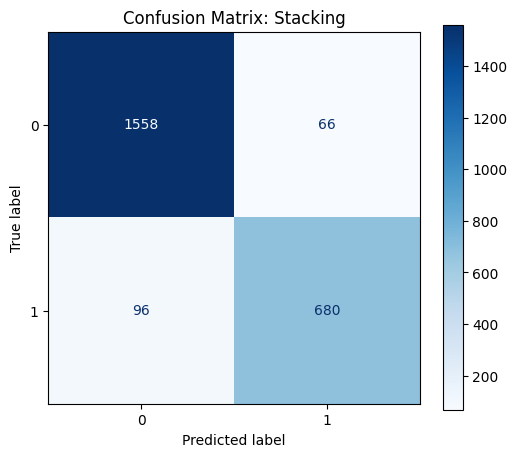

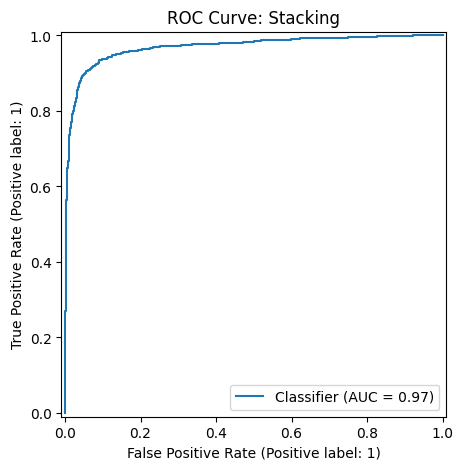

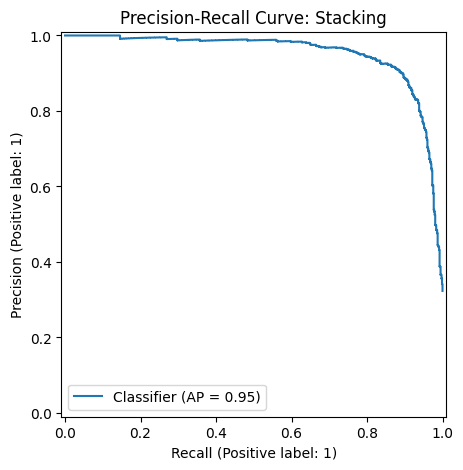


Вычисление Permutation Importance для Stacking.

Top-10 важнейших признаков:
 1. num19                | 0.1040 ± 0.0056
 2. num18                | 0.0914 ± 0.0056
 3. num07                | 0.0569 ± 0.0026
 4. num04                | 0.0272 ± 0.0022
 5. num24                | 0.0164 ± 0.0031
 6. num01                | 0.0140 ± 0.0018
 7. num21                | 0.0127 ± 0.0018
 8. num20                | 0.0112 ± 0.0033
 9. num14                | 0.0107 ± 0.0020
10. num22                | 0.0106 ± 0.0022


C:\Users\andre\AppData\Local\Temp\ipykernel_29560\831594760.py:287: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


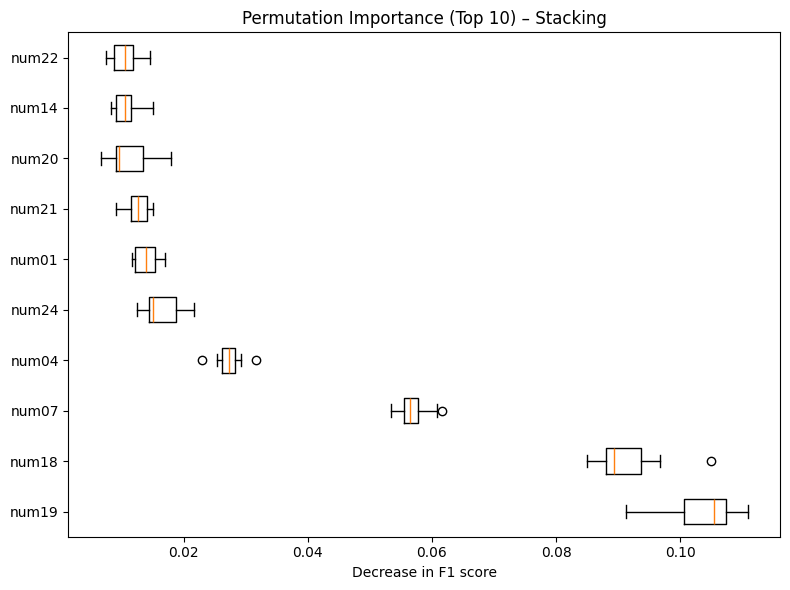


Все артефакты успешно сохранены в папку 'artifacts/'.


In [9]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import joblib
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.inspection import permutation_importance

# Загрузка данных
df = pd.read_csv('S06-hw-dataset-01.csv')

# Первичный анализ
print("Первые 5 строк данных")
print(df.head())

print("\nИнформация о датафрейме")
print(df.info())

print("\nБазовые статистики")
print(df.describe(include='all'))

# Распределение таргета
print("\nРаспределение целевой переменной (target)")
target_counts = df['target'].value_counts()
target_ratios = df['target'].value_counts(normalize=True)
print(target_counts)
print("\nДоли классов:")
print(target_ratios)

# Проверка пропусков
print("\nКоличество пропущенных значений по столбцам")
print(df.isnull().sum())

# Типы данных
print("\nТипы данных столбцов")
print(df.dtypes)

# Разделение на признаки (X) и целевую переменную (y)
feature_columns = [col for col in df.columns if col not in ['id', 'target']]
X = df[feature_columns]
y = df['target']

print(f"\nФорма X: {X.shape}")
print(f"Форма y: {y.shape}")
print(f"Признаки: {list(X.columns)}")

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nРазмер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

# Проверка распределения классов
print("\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True))
print("\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True))

# Фиксированный random_state (seed) обеспечивает воспроизводимость результатов: 
# при каждом запуске кода будет получаться одно и то же разбиение данных. 
# Это важно для отладки, сравнения моделей и обеспечения ~научной~ строгости.

# Стратификация (stratify=y) гарантирует, что пропорции классов в обучающей и тестовой выборках 
# будут такими же, # как в исходном датасете. 
# Это важно при дисбалансе классов, чтобы модель не обучалась/не оценивалась на выборке, 
# в которой один из классов сильно недопредставлен/перепредставлен. 
# Без стратификации качество метрик может быть нестабильным и вводящим в заблуждение.

# Baseline 1: DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

# Baseline 2: Logistic Regression
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])
logreg_pipe.fit(X_train, y_train)
y_pred_logreg = logreg_pipe.predict(X_test)


# Функция для вывода метрик
def print_metrics(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    print(f"\n{model_name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("\nПодробный отчёт:")
    print(classification_report(y_true, y_pred))

print_metrics(y_test, y_pred_dummy, "DummyClassifier")
print_metrics(y_test, y_pred_logreg, "LogisticRegression")

# DummyClassifier (most_frequent) предсказывает только класс 0 (наиболее частый), 
# достигая accuracy 68%, но полностью игнорирует класс 1 (precision, recall и F1 для него — 0). № 

# LogisticRegression значительно лучше: accuracy ≈ 83%, а для миноритарного класса 1 достигает F1 ≈ 0.71, precision ≈ 0.78 и recall ≈ 0.65. 
# Это означает, что модель не только угадывает доминирующий класс, 
# но и успешно выявляет редкий, что критично при решении задачи бинарной классификации с дисбалансом.


# Обучение моделей с GridSearchCV
print("\nОбучение моделей с подбором гиперпараметров")

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt_params = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_leaf': [1, 2, 5, 10],
    'ccp_alpha': [0.0, 0.01, 0.02]
}
dt_cv = GridSearchCV(dt, dt_params, cv=5, scoring='f1', n_jobs=-1)
dt_cv.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_params = {
    'n_estimators': [100],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', None]
}
rf_cv = GridSearchCV(rf, rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_cv.fit(X_train, y_train)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'min_samples_leaf': [1, 2]
}
gb_cv = GridSearchCV(gb, gb_params, cv=5, scoring='f1', n_jobs=-1)
gb_cv.fit(X_train, y_train)


# Сохраняем GridSearchCV-объекты для извлечения метаданных
grid_searches = {
    'DecisionTree': dt_cv,
    'RandomForest': rf_cv,
    'GradientBoosting': gb_cv
}

# Сохраняем лучшие модели
models = {
    'DummyClassifier': dummy_clf,
    'LogisticRegression': logreg_pipe,
    'DecisionTree': dt_cv.best_estimator_,
    'RandomForest': rf_cv.best_estimator_,
    'GradientBoosting': gb_cv.best_estimator_
}

# Stacking 
stack = StackingClassifier(
    estimators=[
        ('dt', dt_cv.best_estimator_),
        ('rf', rf_cv.best_estimator_),
        ('gb', gb_cv.best_estimator_)
    ],
    final_estimator=LogisticRegression(random_state=42),
    cv=5,
    n_jobs=-1
)
stack.fit(X_train, y_train)
models['Stacking'] = stack


# Оценка F1 для всех моделей
results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = f1_score(y_test, y_pred)

# Вывод F1
print("\nF1-score на тестовой выборке")
for name, f1 in results.items():
    print(f"{name:20}: {f1:.4f}")

# Лучшая модель по F1
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nЛучшая модель по F1: {best_model_name} ({results[best_model_name]:.4f})")

# Отчёт для лучшей модели
y_pred_best = best_model.predict(X_test)
print(f"\nПодробный отчёт: {best_model_name}")
print(classification_report(y_test, y_pred_best))


# Сбор всех метрик
all_metrics = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # ROC-AUC (если модель поддерживает predict_proba)
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    except (AttributeError, NotImplementedError):
        auc = None

    all_metrics[name] = {
        'accuracy': float(acc),
        'f1': float(f1),
        'roc_auc': float(auc) if auc is not None else None
    }

# Вывод метрик
print("\nМетрики на тестовой выборке:")
for name, m in all_metrics.items():
    roc_str = f"{m['roc_auc']:.4f}" if m['roc_auc'] is not None else "N/A"
    print(f"{name:20} | Acc: {m['accuracy']:.4f}, F1: {m['f1']:.4f}, ROC-AUC: {roc_str}")


# Сохраненяем графики
# Confusion Matrix
fig, ax = plt.subplots(figsize=(6, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, ax=ax, cmap='Blues')
plt.title(f'Confusion Matrix: {best_model_name}')
plt.savefig('artifacts/figures/confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()
plt.close()

# ROC Curve
try:
    y_proba_best = best_model.predict_proba(X_test)[:, 1]
    fig, ax = plt.subplots(figsize=(6, 5))
    RocCurveDisplay.from_predictions(y_test, y_proba_best, ax=ax)
    plt.title(f'ROC Curve: {best_model_name}')
    plt.savefig('artifacts/figures/roc_curve.png', dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()
except Exception as e:
    print(f"ROC не построен для {best_model_name}: {e}")

# Precision-Recall Curve
try:
    fig, ax = plt.subplots(figsize=(6, 5))
    PrecisionRecallDisplay.from_predictions(y_test, y_proba_best, ax=ax)
    plt.title(f'Precision-Recall Curve: {best_model_name}')
    plt.savefig('artifacts/figures/pr_curve.png', dpi=150, bbox_inches='tight')
    plt.show()
    plt.close()
except Exception as e:
    print(f"PR-curve не построен: {e}")


# Permutation Importance
print(f"\nВычисление Permutation Importance для {best_model_name}.")
perm_imp = permutation_importance(
    best_model, X_test, y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)

indices = np.argsort(perm_imp.importances_mean)[::-1]
top_n = min(10, len(feature_columns))

print(f"\nTop-{top_n} важнейших признаков:")
for i in range(top_n):
    idx = indices[i]
    print(f"{i+1:2}. {feature_columns[idx]:20} | {perm_imp.importances_mean[idx]:.4f} ± {perm_imp.importances_std[idx]:.4f}")

# График важности
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(
    [perm_imp.importances[indices[i]] for i in range(top_n)],
    vert=False,
    labels=[feature_columns[indices[i]] for i in range(top_n)]
)
ax.set_xlabel('Decrease in F1 score')
ax.set_title(f'Permutation Importance (Top {top_n}) – {best_model_name}')
plt.tight_layout()
plt.savefig('artifacts/figures/permutation_importance.png', dpi=150)
plt.show()
plt.close()

# Лучшей моделью по согласованному критерию качества был выбран StackingClassifier, 
# показавший на тестовой выборке значения F1 = 0.8936 и ROC-AUC = 0.9692, 
# что является максимальным результатом среди всех рассмотренных моделей.

# Для интерпретации была рассчитана permutation importance на тестовой выборке. 
# Наибольший вклад в качество классификации вносят признаки `num19` и `num18`: 
# их перестановка приводит к снижению F1 более чем на 0.09–0.10, 
# что указывает на их роль в принятии решений моделью. 
# Существенное, но более умеренное влияние также оказывает признак `num07` (0.5). 
# Остальные признаки из топ-10 
# (`num04`, `num24`, `num01`, `num21`, `num20`, `num14`, `num22`) имеют меньший индивидуальный вклад

# В целом распределение важности выглядит ожидаемым: 
# модель опирается на ограниченное число наиболее информативных признаков, 
# а остальные используются как дополнительные уточняющие факторы. 
# Это подтверждает, что модель выявляет устойчивые закономерности в данных и не переобучается на шум.



# Сохранение артефактов
# Метрики
with open('artifacts/metrics_test.json', 'w') as f:
    json.dump(all_metrics, f, indent=4)

# Результаты поиска гиперпараметров
search_summaries = {}
for name in ['DecisionTree', 'RandomForest', 'GradientBoosting']:
    gs = grid_searches[name]
    search_summaries[name] = {
        'best_params': gs.best_params_,
        'best_cv_score': float(gs.best_score_)
    }

with open('artifacts/search_summaries.json', 'w') as f:
    json.dump(search_summaries, f, indent=4)

# Лучшая модель
joblib.dump(best_model, 'artifacts/best_model.joblib')

# Метаданные лучшей модели
best_meta = {
    'model_name': best_model_name,
    'model_class': type(best_model).__name__,
    'parameters': best_model.get_params(),
    'test_metrics': all_metrics[best_model_name]
}

with open('artifacts/best_model_meta.json', 'w') as f:
    json.dump(best_meta, f, indent=4, default=str)

print("\nВсе артефакты успешно сохранены в папку 'artifacts/'.")